# 군집화(Clustering)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### iris 데이터로 군집화

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=['sl', 'sw', 'pl', 'pw'])
iris_df.head()

,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### K-Means 모델 생성/학습

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=2021)
kmeans.fit(iris_df)

KMeans(n_clusters=3, random_state=2021)

In [4]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [5]:
iris_df['target'] = iris.target         # 실제 target class
iris_df['cluster'] = kmeans.labels_     # Clustering 결과 도출된 class
iris_df.head()

,sl,sw,pl,pw,target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [7]:
clustering_result = iris_df.groupby(['target', 'cluster']).count()
clustering_result.head()

sl  sw  pl  pw
target cluster                
0      1        50  50  50  50
1      0        48  48  48  48
       2         2   2   2   2
2      0        14  14  14  14
       2        36  36  36  36

### 군집화 결과를 차원 축소하여 시각화

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
pca = PCA(n_components=2)

iris_std = scaler.fit_transform(iris.data)
iris_pca = pca.fit_transform(iris_std)

In [9]:
iris_df['pca_x'] = iris_pca[:, 0]
iris_df['pca_y'] = iris_pca[:, 1]
iris_df.head()

,sl,sw,pl,pw,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,0,1,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,0,1,-2.364229,-0.341908
3,4.6,3.1,1.5,0.2,0,1,-2.299384,-0.597395
4,5.0,3.6,1.4,0.2,0,1,-2.389842,0.646835


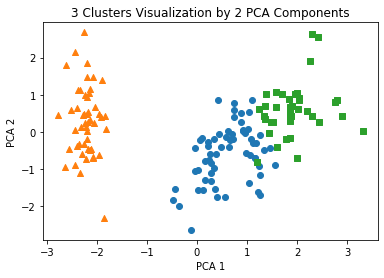

In [10]:
cls0_index = iris_df[iris_df['cluster'] == 0].index
cls1_index = iris_df[iris_df['cluster'] == 1].index
cls2_index = iris_df[iris_df['cluster'] == 2].index

plt.scatter(x=iris_df.loc[cls0_index, 'pca_x'], y=iris_df.loc[cls0_index, 'pca_y'], marker='o')
plt.scatter(x=iris_df.loc[cls1_index, 'pca_x'], y=iris_df.loc[cls1_index, 'pca_y'], marker='^')
plt.scatter(x=iris_df.loc[cls2_index, 'pca_x'], y=iris_df.loc[cls2_index, 'pca_y'], marker='s')

plt.xlabel('PCA 1'); plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

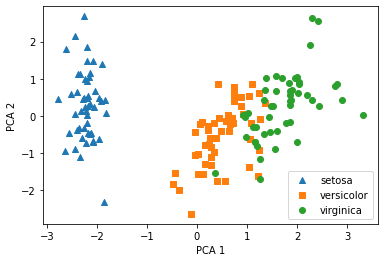

In [11]:
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = iris_df[iris_df.target == i]['pca_x']
    y_axis_data = iris_df[iris_df.target == i]['pca_y']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

### 비교 그림

In [ ]:
fig, asx = plt.subplot(figsize=(12, 6), ncols=2, nrows=1)

### Clustering 알고리즘 테스트를 위한 데이터 생성

In [24]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=4, random_state=2021)
print(X.shape, y.shape)

(200, 2) (200,)


In [25]:
# target의 분포
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

[0 1 2] [67 67 66]


In [26]:
cluster_df = pd.DataFrame(X, columns=['ftr1', 'ftr2'])
cluster_df['target'] = y
cluster_df.head()

,ftr1,ftr2,target
0,-1.420755,0.524051,1
1,9.606759,-16.785233,2
2,9.463470,-12.342820,2
3,5.992541,-9.566412,2
4,-5.988626,4.843629,1


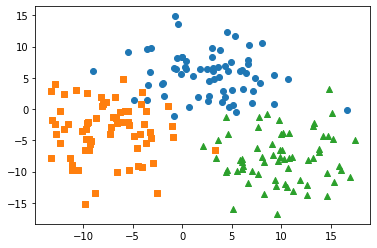

In [27]:
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

target_list = np.unique(y)
for target in target_list:
    target_cluster = cluster_df[cluster_df.target == target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], marker=markers[target])
plt.show()

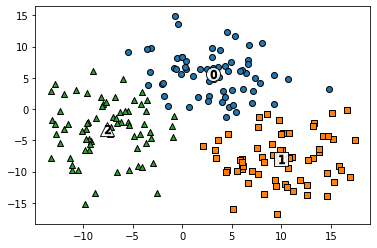

In [28]:
# X 데이터 K-Means Clustering 수행
kmeans = KMeans(n_clusters=3, random_state=2021)
cluster_labels = kmeans.fit_predict(X)
cluster_df['kmeans_label'] = cluster_labels

# cluster_centers_는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)

# 군집된 label 유형별로 iteration 하면서 marker별로 scatter plot 수행
for label in unique_labels:
    label_cluster = cluster_df[cluster_df['kmeans_label'] == label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])

    #군집별 중심 위치 좌표 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
plt.show()